<font size=18 color='blue'>Análise Exploratória</font>

# Configuração do Projeto

### Bibliotecas

- Pandas
  
- Matplotlib

## Importando as bibliotecas


In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
pd.options.display.colheader_justify = 'left'

## Upload do dataset

In [3]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (2).xlsx


# Criando DataFrame

In [4]:
# Criando Dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [5]:
# Visualizando primeiras linhas do DataFrame
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
# Tipos de dados do DataFrame
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
# Qual a Receita Total
df['Valor Venda'].sum()

5984606.1426

In [9]:
# Qual o custo Total?

## Criando uma nova coluna de custo
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [10]:
# Criando coluna de lucro que será a Receita - Custo
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [11]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [12]:
# Total de Lucro
round(df['Lucro'].sum(), 2)

3497823.09

In [13]:
# Criando uma coluna com Total de dias para enviar o produto
df['Tempo_envio'] = df['Data Envio'] - df['Data Venda']

In [14]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Agora, queremos saber a média do tempo de envio para cada Marca, para isso precisamos transformar a coluna Tempo_envio em númerica**

In [15]:
# Extraindo apenas os dias
df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [17]:
# Verificando tipo do Tempo_envio
df['Tempo_envio'].dtypes

dtype('int64')

In [18]:
# Média do tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

## Tratando valores Faltantes (Missing Values)

In [19]:
# Verificando valores faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

## Análisando o Dataset para saber o Lucro por Ano e por Marca

In [20]:
# Agrupando por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [24]:
pd.options.display.float_format = '{:20,.2f}'.format

In [25]:
# Resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [26]:
# Qual a total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

# Visualização Gráfica dos dados de Vendas

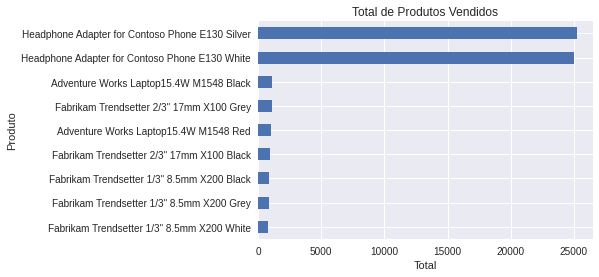

In [28]:
# Gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title= "Total de Produtos Vendidos")
plt.xlabel('Total')
plt.ylabel('Produto');

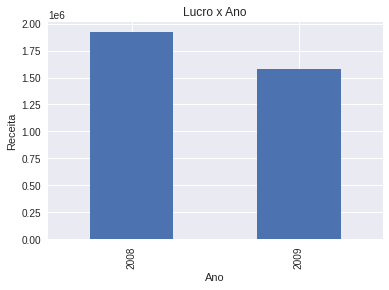

In [30]:
# Visualizando gráfico de lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title= "Lucro x Ano")
plt.xlabel('Ano')
plt.ylabel('Receita');

In [31]:
# Analisando vendas por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

## Análise de vendas do ano de 2009

In [32]:
# Criando uma variável e Selecionando as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [33]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


### Visualizando Gráficos de venda do ano de 2009

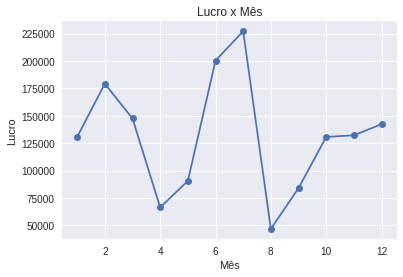

In [35]:
df_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot(title= "Lucro x Mês", marker= 'o')
plt.xlabel('Mês')
plt.ylabel('Lucro');

### Visualizando Gráfico de lucro por marca de 2009

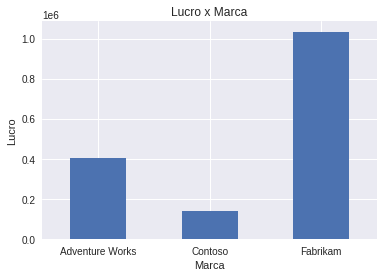

In [36]:
df_2009.groupby("Marca")['Lucro'].sum().plot.bar(title= 'Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation= 'horizontal');

### Visualizando Gráfico de lucro por classe do ano de 2009

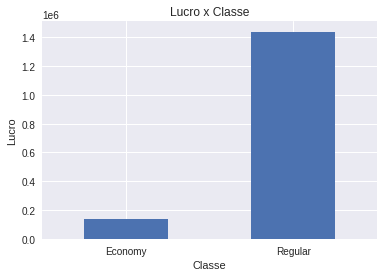

In [38]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title= "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel('Lucro')
plt.xticks(rotation= 'horizontal');

## Análise Estátisticas  de Tempo de envio de produtos

In [39]:
# Análise estátistica
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

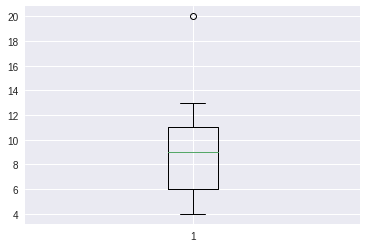

In [41]:
# Gráficos de Boxplot
plt.boxplot(df['Tempo_envio']);

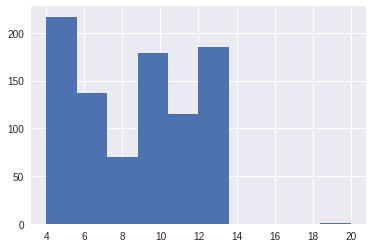

In [42]:
# Histograma
plt.hist(df["Tempo_envio"]);

In [43]:
# Tempo mínimo de envio
df["Tempo_envio"].min()

4

In [44]:
# Tempo máximo de envio
df["Tempo_envio"].max()

20

In [45]:
# Indentificando Outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


## Salvando Dataset tratado na análise

In [46]:
df.to_csv("df_vendas.csv", index=False)